In [1]:
import numpy as np
import pandas as pd


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<center> 

# Data Collection

## Dr. Lange- University of Chicago
## Data 11800 - Winter 2024 

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/UChicago_DSI.png" alt="UC-DSI" width="500" height="600">
    
</center>

##### <code style="background:Thistle;color:black">Question to think on:</code>
 Why do Data Scientists need to understand how their data was collected?

## This week

* Causality vs Association
* Observational studies versus experiments
* Sampling and sampling schemes
* Sampling biases
* Simulation

## Who remembers this?

<center>

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/Election2016.png" alt="ClintonvsTrump" width="500" height="600">
    
</center>

Multiple reasons for this issue... 
 
 - Post-Election Surveys Say Trump Won Undecided Voters
    
 - Better-educated voters to respond to surveys - was more of an issue for 2016

<center>
<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/collection/election16.png" alt="ed" width="50%">
    
</center>

## Big data is not necessarily better data

The quality of results obtained from data analysis is only as good as the data used (garbage-in garbage-out)

Analysis should involve good design, measurement and collection of data. Possible issues:

* how to design the data collection, so we can answer the questions of interest?
* from how many individuals or subjects should we collect the data?
* how do we select the subjects?
* how do we assign treatments in an experiment?

When gathering data, we are looking for patterns or relations between variables. When there exists a pattern between two variables, we call this an *association* or *correlation*.

<center>
<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/collection/corr_1.png" alt="corr" width="80%">
    
</center>

<center>
<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/collection/corr_2.png" alt="corr" width="80%">
    
</center>

When we see that two variables $X$ and $Y$ are associated, we often wonder if one causes the other. There are 3 common scenarios:

**Causation**: change in $X$ causes change in $Y$ (or vice-versa).

**Common response (Confounding)**: some other variable $Z$ causes change in both $X$ and $Y$. In this case $Z$ is a confounding variable. 

**Colliding**: Changes in both $X$ and $Z$ cause change in some variable $Y$. In this case $Y$ is a collider, or colliding variable. 

<center>

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/DAGs.png" alt="DAGS" width="900">
    
</center>


**Examples**

## **Causation** 

    - The number of cigarettes smoked does have a causal relationship with the rate of lung cancer. 
    
    - going outside on the beach on a sunny day -----> sunburn
 
    
    - getting promotion ------> salary increase


## **Common Response** 

There is a third variable affecting both X and Y. This variable Z may confound, or confuse, you on the relationship between X and Y.

 <center>
<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/collection/confound.png" alt="confound" width="80%">
    
</center>

  - getting promotion ----> salary increase
  
  - getting promotion ---> bigger office space
  
  
Now there is an association between salary increase and office space.....that's not casual

## Common Response

Here's classic example of a confounding variable. A study of hospital patients. 

 $X$  = did the patient take an ambulance or not.
 
 $Y$  = length of their hospital stay. 

It turns out taking an ambulance is associated with worse outcomes, and longer stays in hospital patients. Is taking an ambulance worse that being driven by a family member?

What's the confounding variable?

## **Colliding** 
Two variables X and Y are both causes of a third variable Z 

Classic example:

 <center>
<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/collection/talent1.png" alt="collide" width="30%">
    
</center>

X = Acting Talent

Y = Attractiveness


Z = Celebrity

 <center>
<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/collection/talent2.png" alt="collide" width="30%">
    
</center>

### Colliding Variables, can be an issue if you are looking at certain populations.

## Common Misconception

A confounding variable is **NOT** an intermediate variable in a causative chain. 

Say a study of people in the United States finds that wealthier people on average live longer. You might say, maybe it's because wealthier typically can afford better healthcare.

While this might be true, what you described is **NOT** a confounding variable. It is an explanation for a potential casual relationship. 

You wouldn't say that quality of healthcare access is a confounding variable.

If you conduct a study, you should try to account for confounding variables before you collect data.

**Lurking Variable:** A confounding variable that is not directly measured or accounted for in a study that results in a spurious association. This is usually not possible to account for without collecting more data.


Pause...motivation

### How to properly account for a confounder

Conditioning on a confounding variable is best practice to remove the spurious association between X and Y

**Conditioning**: looking at only one value of the conditioned variable

eg. When we condition on weather and only consider ice cream sales and swimming on warm days in the summer months, the association disappears.

Condition only on confounding variables! Conditioning on colliding variables will cause associations to appear where there are none.

## Example - Conditioning
Let's look at some data, to see how Confounders and Colliders can affect analysis of data.

In [2]:
import pandas as pd
import numpy as np
data = pd.DataFrame({'Ice Cream Sales':[1, 2, 10,15, 9,20, 50, 43, 45, 48, 51, 40, 50 ], 'Shark Attacks':[0,1, 3, 2,4,5, 6, 6, 7, 6, 6, 5, 7],
                     'Weather (F)' :[15,28, 30, 34,36,50, 60, 70, 71, 74, 80, 70, 75 ]}, index = ['Jan' ,'Feb1','Feb2','Feb3', 'Mar', 'April', "May", 'June1','June2', 'June3', 'June4', 'July', 'Aug'] )
data

,Ice Cream Sales,Shark Attacks,Weather (F)
Jan,1,0,15
Feb1,2,1,28
Feb2,10,3,30
Feb3,15,2,34
Mar,9,4,36
April,20,5,50
May,50,6,60
June1,43,6,70
June2,45,7,71
June3,48,6,74


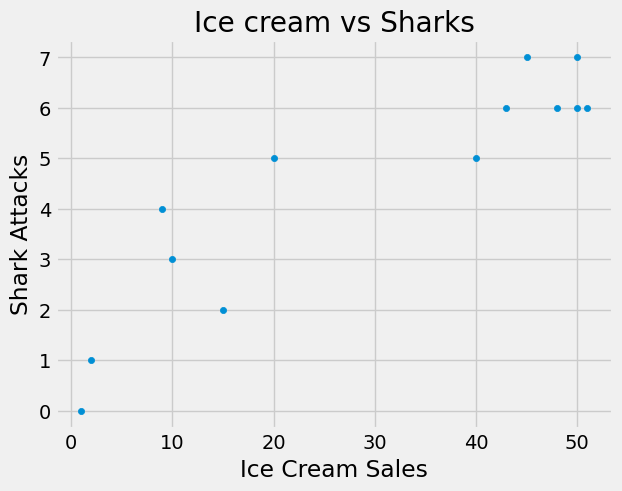

In [3]:
data.plot.scatter('Ice Cream Sales', 'Shark Attacks', title = 'Ice cream vs Sharks');

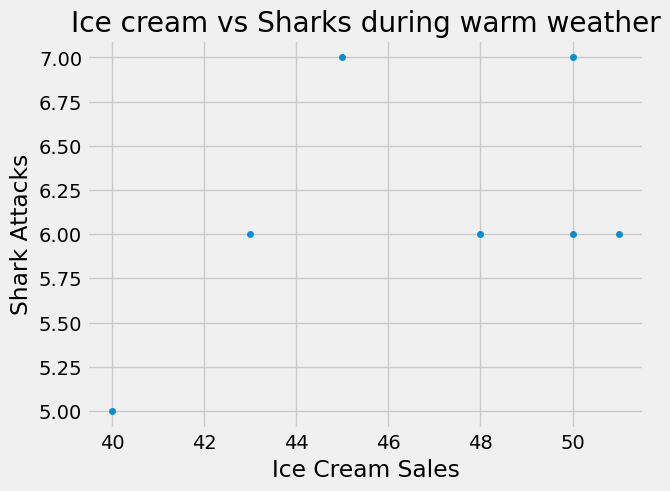

In [4]:
# If we control for weather by only looking at warm days, the association largely disappears
data.loc[data['Weather (F)']>50].plot.scatter('Ice Cream Sales', 'Shark Attacks',title = 'Ice cream vs Sharks during warm weather');

In [5]:
#Let's look at an example of colliding variables
mom = np.array((1.8,2.1,1.6,2,2,1.9,1.6,2.5,2.4))
dad = np.array((2,1.9,1.6,2.5,1.8,2.1,2.2,1.6,2.5))
height_df = pd.DataFrame({"child height": (1.95,2.05,1.65,2.3,1.95,2.05,1.95,2.1,2.5),
                          "mothers_height (m)" : mom,"fathers_height (m)":dad})
height_df

,child height,mothers_height (m),fathers_height (m)
0,1.95,1.8,2.0
1,2.05,2.1,1.9
2,1.65,1.6,1.6
3,2.30,2.0,2.5
4,1.95,2.0,1.8
5,2.05,1.9,2.1
6,1.95,1.6,2.2
7,2.10,2.5,1.6
8,2.50,2.4,2.5


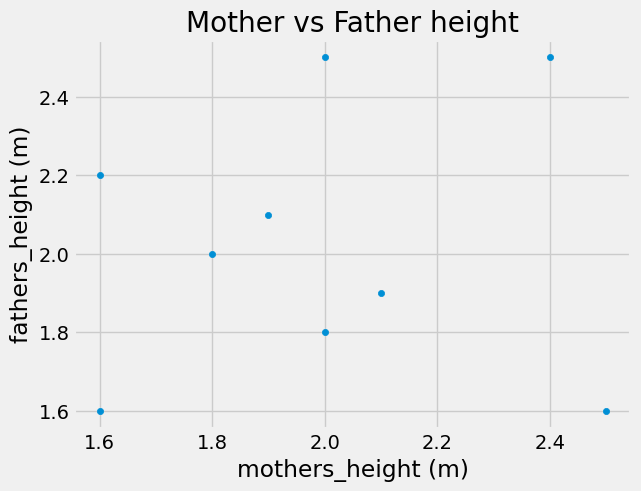

In [6]:
height_df.plot.scatter("mothers_height (m)","fathers_height (m)", title = 'Mother vs Father height');

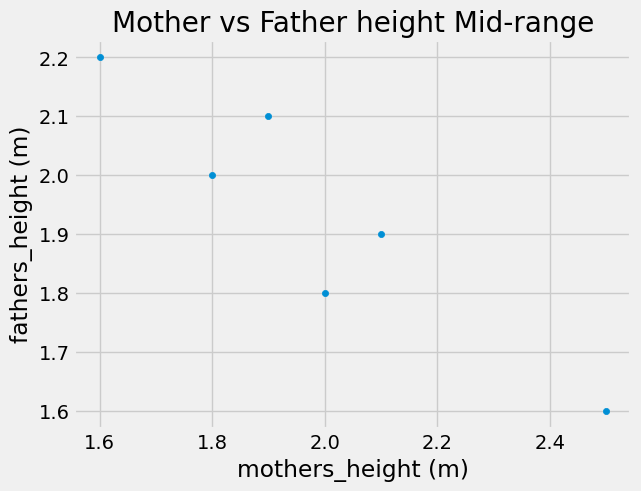

In [7]:
mid_height = height_df.loc[(height_df["child height"]<=2.1) & (height_df["child height"]>1.8)]
mid_height.plot.scatter("mothers_height (m)","fathers_height (m)", title ='Mother vs Father height Mid-range');

### So how does one actually show causation? (optional slide....not tested on)

There are 3 necessary and sufficient conditions

 - Temporal Precedence: We must show that X (the cause) happened before Y (the effect).
 
 - Non-spuriousness: We must show that the effect Y was not seen by chance.
 
 - No alternate cause: We must show that no other variable accounts for the relationship between X and Y.

### Data Collection

- observational

    - Captured through observation of a behavior or activity.

- experimental

    - Collected through active intervention by the researcher to produce and measure change 

- simulation

    - generated by imitating the operation of a real-world process by way of a computer program

- derived

    - using existing data points, often from different data sources, to create new data 

# Experimental vs Observational Studies

Information on how factors affect response can be gained from:

* **Experiments**: one or more factors controlled by experimenter (deliberately impose certain treatments on individuals in order to observe their responses)
* **Observational studies**: no effort/intention to manipulate the object of study (collect the data without interfering with the subjects)

## Experiments and Experimental Design

**Control**: to understand the effects of a treatment, need a control group

**Replication**: applying a treatment independently to two or more experimental units

**Randomization**: random assignment of treatments to experimental units.

## Types of Observational Studies

**Retrospective studies**: collect data after events have
taken place (e.g. past records, historical data). 
 * Example Select a group of people who had skin cancer and a group of controls (no skin cancer) and ask about tanning bed usage

**Prospective studies**: identifies individuals and collects information as events unfold. 
  * Example: Enroll 500 subjects. Ask them to complete daily diet diaries (used to estimate the amount of sodium intake). Measure their blood pressure

# Sampling

Goal: conclusions about a population

Not feasible to collect information on every individual/subject
* expensive
* errors: bored people do not count carefully

Use sampling instead: study a part in order to gain information about the whole (statistical inference)

A poorly designed sampling procedure can produce misleading conclusions.
* Example (Voluntary response sample)
  * Advice columnists Ann Landers asked her readers, "If you had it to do over again, would you have children?"
  * Almost 10,000 readers wrote in, and 70% of them said no.
  * This is a self-selected sample, worthless as indicator of opinion of the population.
  * Newsday conducted a ‘statistically designed’ opinion poll and found that 91% of parents studied said yes!

## Sampling Definitions

**Population**: the entire group of objects or people about which information is wanted.

**Units**: individual members of the population

**Census**: a survey of an entire population

**Sample**: the part of the population actually examined in order to gather information

**Sampling Design**: the particular process by which asample is selected

**Sample size**: the number of people in the sample (n)

**Parameter**: a numerical characteristic of a population

**Statistic**: a numerical characteristic of a sample

## Simple Random Sampling

A **simple random sample (SRS)** of size n from a population is one in which every group of n units has an equal chance of being selected as the sample.

We use a SRS to:
* eliminate sampling bias
* mathematically or computationally quantify variation due to sampling (i.e. the precision of our sample estimates)

Need a sampling frame (e.g., list of names of all subjects in a population)

Impractical for large populations

<center>
<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/collection/srs.png" alt="srs" width="40%">
    
</center>

Suppose I have five colored marbles in a hat

I draw one marble from the hat without looking

All marbles have the same chance of being selected, one in five

Therefore, my marble choosing example is an SRS

We can conduct an SRS easily in python using `np.random.choice`

In [16]:
np.random.seed(1890)

marbles = ["red", "blue", "yellow", "green", "brown"]

print(np.random.choice(marbles))
print(np.random.choice(marbles))

brown
yellow


The function `np.random.seed` takes in an integer and uses it to set the state of the random number generator

This makes the results of our `random.choice` the same for anyone using the same integer as their seed

Suppose I take the yellow, green, and brown marbles out of my hat

We can depict this in code by removing the yellow green and brown elements from the marbles array and taking a SRS:

In [25]:
marbles = ["red", "blue"]

np.random.choice(marbles)

'red'

Or, we can give different elements different chances of being chosen by using the argument `p` which takes in an array of the same size as marbles

This is no longer a SRS!

In [31]:
marbles = ["red", "blue", "yellow", "green", "brown"]

np.random.choice(marbles, p=[0.5, 0.5, 0, 0, 0])

'blue'

We can also use np.random.choice to take a sample with more than 1 element (sample size > 1) by using the size argument.

In [32]:
marbles = ["red", "blue", "yellow", "green", "brown"]

np.random.choice(marbles, size=5)

array(['blue', 'yellow', 'brown', 'brown', 'green'], dtype='<U6')

The np.random.choice function assumes that samples are being taken with replacement

Many times, we want to sample without replacement

To sample without replacement, set the `replace` argument to False.

In [ ]:
marbles = ["red", "blue", "yellow", "green", "brown"]

np.random.choice(marbles, size=5, replace=False)

## Stratified Sampling

**Stratified random sample**: Divide the population into sub-populations (called strata) of similar units and choose a separate SRS for each stratum.

The aim is to obtain more exact information than an SRS of the same size.

It works better when cases within stratum are similar but there are large discrepancies between strata.

Cons: need sampling frames for each strata.

Example (University survey): "Do you favor the creation of a degree program in data science?" Possible strata?


<center>
<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/collection/strs.png" alt="strs" width="50%">
    
</center>

In [ ]:
first_year = ['Sam', 'Lin', 'Anne', 'John', 'Chen']
second_year = ['Ashley', 'Brenda', 'Marc']
third_year = ['Aaron', 'Randy', 'Kathy']
fourth_year = ['Joann', 'Mary']

[np.random.choice(first_year), np.random.choice(second_year),
         np.random.choice(third_year), np.random.choice(fourth_year)]

## Cluster Sampling

**Cluster sampling**: Population is divided into clusters; Select a sample of clusters.

Works better when there is small cluster-to-cluster variation but large variation within clusters.

<center>
<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/collection/cluster.png" alt="cluster" width="40%">
    
</center>

In [10]:
zipcodes = [60615, 60637, 60607, 60605, 60604, 60616, 60617, 60609, 60653, 60638]

np.random.choice(zipcodes, 3, replace=False)

array([60609, 60637, 60615])

## Multistage Sampling

This is often done for nationwide samples of families,
households, or individuals.

Sampling is conducted in stages.

Example: Government data on unemployment are gathered by the Current Population Survey, which conducts interviews in about 60,000 households each month. An SRS is impractical. The final sample consists of clusters of nearby households. To take a national multistage sample:
* Stage 1: Select a sample from the 3000 counties of the US
* Stage 2: Select a sample of townships within each of the counties chosen
* Stage 3: Select a sample of city blocks within each chosen township
* Stage 4: Take a sample of households within each city block


<center>
<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/collection/multi.png" alt="multi" width="80%">
    
</center>

## Sampling Bias

**Selection bias**: systematic error favoring some parts of the population over others (eg voluntary response sample).

**Non-response bias**: people who decline to respond may be different from those who do respond (with respect to the
issue of interest)

**Response bias**: there are sometimes incentives to lie. Influenced by phrasing of questions, tone/attitude of interviewer, questions about illegal/unpopular behavior (e,g, "Do you wash your hands after using the bathroom?" or "Have you violated social distancing guidelines?")

## Truman vs Dewey

<center>
<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/collection/truman.png" alt="truman" width="50%">
    
</center>

How many college students have cheated on an exam?

Students are unlikely to tell me the truth leading to response bias...

### How does this apply to what we've been doing so far?!

We can be aware of association in variables in our dataset!
     - is there a casual relationship?
     - might there be a confounding or colliding variable that is affecting our relationship of interest?

We can take random samples of our DataFrame!


If the data is already collected - we can sample from a particularly large dataset to see how the subset relates to the collected sample.
 
 
We can simulate experiments!

Let's focus on simulation, or mimicking real world situations using code.

Suppose we have a list of choices that are equally likely to occur and we want to choose one.


In [2]:
two_groups = ['treatment', 'control']

In NumPy, the function 
```python 
np.random.choice(…)
```
will output exactly one item from the input sequence, selecting from it randomly and uniformly - or with equal opportunity.

In [3]:
import numpy as np

np.random.choice(two_groups) 

'control'

In [37]:
np.random.choice(two_groups) 

'treatment'

In [1]:
np.random.choice(two_groups)

NameError: name 'np' is not defined

The default of `np.random.choice()` is to choose with replacement. That is, put all element back into the list before choosing again. 
We can specify if we want to change this default: 

`np.random.choice(list, replace=False)`


What else can we do with the `np.random.choice()`?

In [38]:
np.random.choice(two_groups, 7) # we can repeat the experiment n=7 number of times

array(['treatment', 'treatment', 'treatment', 'control', 'treatment',
       'treatment', 'control'], dtype='<U9')

We can also count how many of each category we have:

In [44]:
sum(np.random.choice(two_groups, 7) == 'treatment')

5

What is this doing again? Comparing each element to 'treatment' and giving us a Boolean array (with just True/False entires). Then the `sum` 

In [ ]:
np.random.choice(two_groups, 7) == 'treatment'

Note this random choice function will give us a different result each time. 

We might want to have our exact experiment repeatable. We can set a random seed.

In [ ]:
np.random.seed(180) #every time we repeat this experiment we will get the same output!!!

marbles = ["red", "blue", "yellow", "green", "brown"]

np.random.choice(marbles)

By default, we have a SRS (simple random sample).

We can sample from DataFrames either directly using the `np.random.choice` function. (Be careful with the defaults though, would we want replace = True or replace = False if we are sampling from a DataFrame?)


    - SRS - randomly choosing indices from the DataFrame and selecting corresponding rows
    
    - Systematic sampling: choosing every Nth row

There are also methods to directly sample from a DataFrame!



```python
df.sample(n, replace = False)
```

The default for this method is to sample without replacement, where $n$ is the number of rows to sample.

## Simulation

We can use the np.random.choice function in combination with for loops to *simulate* an experiment!

There are several steps in designing and executing a simulation:

 - Conceptualize what to simulate;
 
 - Simulate one instance;
 
 - Decide on the number of repetitions;
 
 - Summarize the results of the simulation.

Suppose we want to repeat the process of rolling a die 100 times and seeing how many even numbers occur.

### Conceptualize  and simulate one instance:

One instance corresponds to rolling a die 100 times and counting the number of evens.

We need to

 -  define a die
 
 -  produce 100 random numbers

 -  count total evens
         - define a function

In [ ]:
die = np.arange(1, 7)
die

In [ ]:
def parity(input_integer): 
    """Determines the parity of an integer input i.e. if a number is even or odd"""
    if (input_integer % 2) == 0:
        return "even"
    else:
        return "odd"

Now we choose 100 random values from our die

In [ ]:
choices = np.random.choice(die, 100)
choices

We want to run this array through our function...but our function only takes integer values.

Instead of a for loop, we'll call `np.vectorize` which takes a function as input and returns as output a function that acts on an entire array. 
 hat is, it allows for element-wise evaulation of our parity function!

In [ ]:
vec_parity = np.vectorize(parity)  #Now this is a function that takes an array as input

In [ ]:
labels = vec_parity(choices)
labels

We really want to count how many evens we have!

In [ ]:
sum(labels == 'even')

That is one instance. We want to repeat this process.... Let's use a for loop.

In [ ]:
import numpy as np
num_experiments = 1_000 #set the experiment count

total_evens = np.empty(0)


for i in np.arange(num_experiments):  # alternatively we could use: range(num_experiments)
    choices = np.random.choice(die, 100)
    labels = vec_parity(choices)
    total_evens = np.append(total_evens, sum(labels == 'even')) 

### Summarize the output of the simulation!

In [ ]:
print('Number of experiments: {:,}'.format(len(total_evens)))
print('Min Evens (out of 100):', min(total_evens))
print('Max Evens (out of 100):', max(total_evens))
print('Mean Evens (out of 100):', round(np.mean(total_evens)))

In [ ]:
import pandas as pd

legend = "Even numbers in " +str(num_experiments)+ " tosses"

pd.DataFrame({legend: total_evens}).hist(bins=np.arange(25, 76));

Notice, above we created a dataframe so that we could easily use the `.hist` to plot!

In [ ]:
pd.DataFrame({legend: total_evens})